# Load Libraries and initial analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/amulya/Desktop/Elsewhere/me/Work/Hackathons/Numhack/Temperature-and-Coral-Bleaching/notebooks/Cleaned_Coral_Data.csv')

In [38]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,40881,40882,40883,40884,40885,40886,40887,40888,40889,40890
Latitude_Degrees,23.163,-17.575,18.369,17.76,17.769,9.822,17.811,-3.99,25.425,-19.1975,...,-6.1562,-6.1511,-3.26,-3.26,-8.3651,-8.3651,-8.3473,-8.3473,-8.3445,-8.3445
Longitude_Degrees,-82.526,-149.7833,-64.564,-64.568,-64.583,-75.891,-64.63,39.75,-80.161,146.815,...,39.1223,39.1266,40.15,40.15,116.0844,116.0844,116.0503,116.0503,116.0629,116.0629
Ocean_Name,Atlantic,Pacific,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic,Indian,Atlantic,Pacific,...,Indian,Indian,Indian,Indian,Pacific,Pacific,Pacific,Pacific,Pacific,Pacific
Realm_Name,Tropical Atlantic,Eastern Indo-Pacific,Tropical Atlantic,Tropical Atlantic,Tropical Atlantic,Tropical Atlantic,Tropical Atlantic,Western Indo-Pacific,Tropical Atlantic,Central Indo-Pacific,...,Western Indo-Pacific,Western Indo-Pacific,Western Indo-Pacific,Western Indo-Pacific,Central Indo-Pacific,Central Indo-Pacific,Central Indo-Pacific,Central Indo-Pacific,Central Indo-Pacific,Central Indo-Pacific
Ecoregion_Name,Cuba and Cayman Islands,Society Islands French Polynesia,Hispaniola Puerto Rico and Lesser Antilles,Hispaniola Puerto Rico and Lesser Antilles,Hispaniola Puerto Rico and Lesser Antilles,Netherlands Antilles and south Caribbean,Hispaniola Puerto Rico and Lesser Antilles,Kenya and Tanzania coast,Bahamas and Florida Keys,Central and northern Great Barrier Reef,...,Kenya and Tanzania coast,Kenya and Tanzania coast,Kenya and Tanzania coast,Kenya and Tanzania coast,Lesser Sunda Islands and Savu Sea,Lesser Sunda Islands and Savu Sea,Lesser Sunda Islands and Savu Sea,Lesser Sunda Islands and Savu Sea,Lesser Sunda Islands and Savu Sea,Lesser Sunda Islands and Savu Sea
Country_Name,Cuba,French Polynesia,United Kingdom,United States,United States,Colombia,United States,Kenya,United States,Australia,...,Tanzania,Tanzania,Kenya,Kenya,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
State_Island_Province_Name,Havana,Society Islands,British Virgin Islands,US Virgin Islands,US Virgin Islands,Sucre,US Virgin Islands,Mombasa County,Florida,Queensland,...,Zanzibar Archipelago,Zanzibar Archipelago,Kilifi County,Kilifi County,West Nusa Tenggara,West Nusa Tenggara,West Nusa Tenggara,West Nusa Tenggara,West Nusa Tenggara,West Nusa Tenggara
City_Town_Name,8519.23,1431.62,182.33,313.13,792.0,4569.6,2399.36,1004.93,3920.39,2750.37,...,683.35,132.8,1982.59,1982.59,91.31,91.31,129.08,129.08,209.17,209.17
Distance_to_Shore,8519.23,1431.62,182.33,313.13,792.0,4569.6,2399.36,1004.93,3920.39,2750.37,...,683.35,132.8,1982.59,1982.59,91.31,91.31,129.08,129.08,209.17,209.17
Exposure,Exposed,Exposed,Exposed,Exposed,Exposed,Sometimes,Exposed,Sheltered,Sometimes,Sheltered,...,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered


In [14]:
df.duplicated().sum()

175

In [16]:
# Drop duplicate rows
df = df.drop_duplicates(keep='first')

# Reset the index of the dataset
df.reset_index(drop=True, inplace=True)

We will copy the cleaned data into a new data frame to preserve the original for future reference during analysis.

In [17]:
# Copy the original dataset for analysis to avoid modifying the cleaned dataset
data_for_eda = df.copy()

# Initial Data Vizualizations

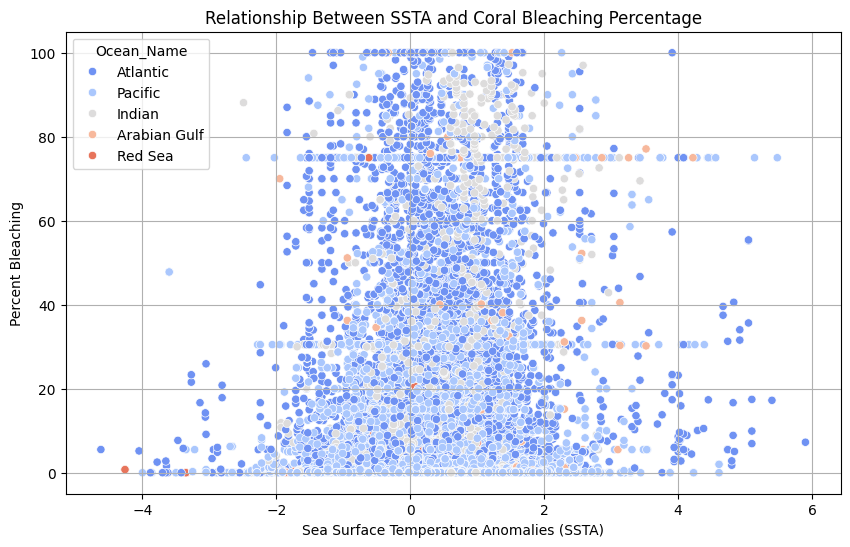

In [4]:
# Visualization 1: Relationship Between SSTA and Percent Bleaching
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="SSTA", y="Percent_Bleaching", hue="Ocean_Name", palette="coolwarm")
plt.title("Relationship Between SSTA and Coral Bleaching Percentage")
plt.xlabel("Sea Surface Temperature Anomalies (SSTA)")
plt.ylabel("Percent Bleaching")
plt.grid(True)
plt.show()

/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_49719/369973386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_bleaching, x="Ocean_Name", y="Percent_Bleaching", palette="viridis")


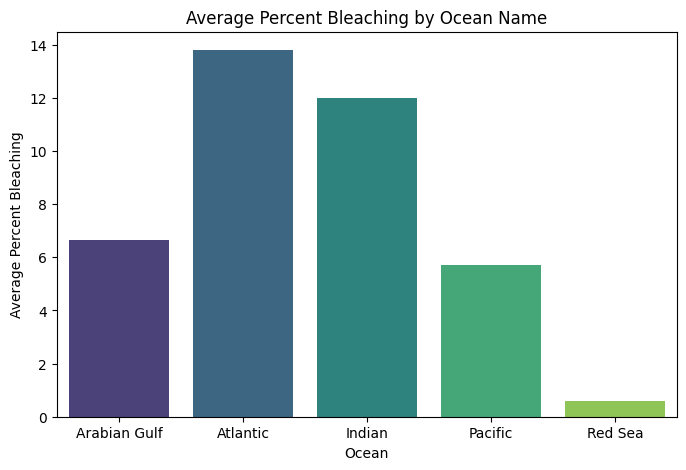

In [5]:
# Visualization 2: Average Percent Bleaching by Ocean Name
avg_bleaching = df.groupby("Ocean_Name")["Percent_Bleaching"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_bleaching, x="Ocean_Name", y="Percent_Bleaching", palette="viridis")
plt.title("Average Percent Bleaching by Ocean Name")
plt.xlabel("Ocean")
plt.ylabel("Average Percent Bleaching")
plt.show()

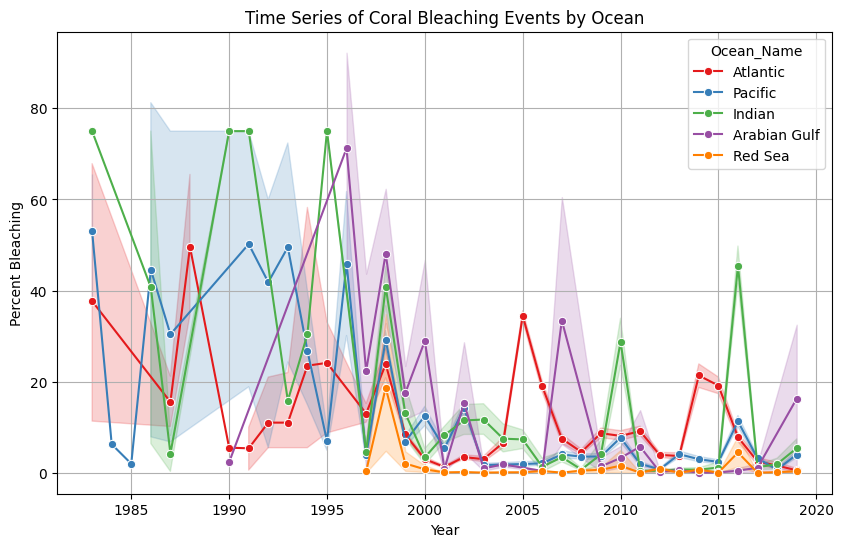

In [6]:
# Visualization 3: Time Series of Bleaching Events (Year vs. Percent Bleaching)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Date_Year", y="Percent_Bleaching", hue="Ocean_Name", marker="o", palette="Set1")
plt.title("Time Series of Coral Bleaching Events by Ocean")
plt.xlabel("Year")
plt.ylabel("Percent Bleaching")
plt.grid(True)
plt.show()

# Insights gathered from the Variables

To gain an overview of the dataset, we will start by examining the geographic distribution of the data.

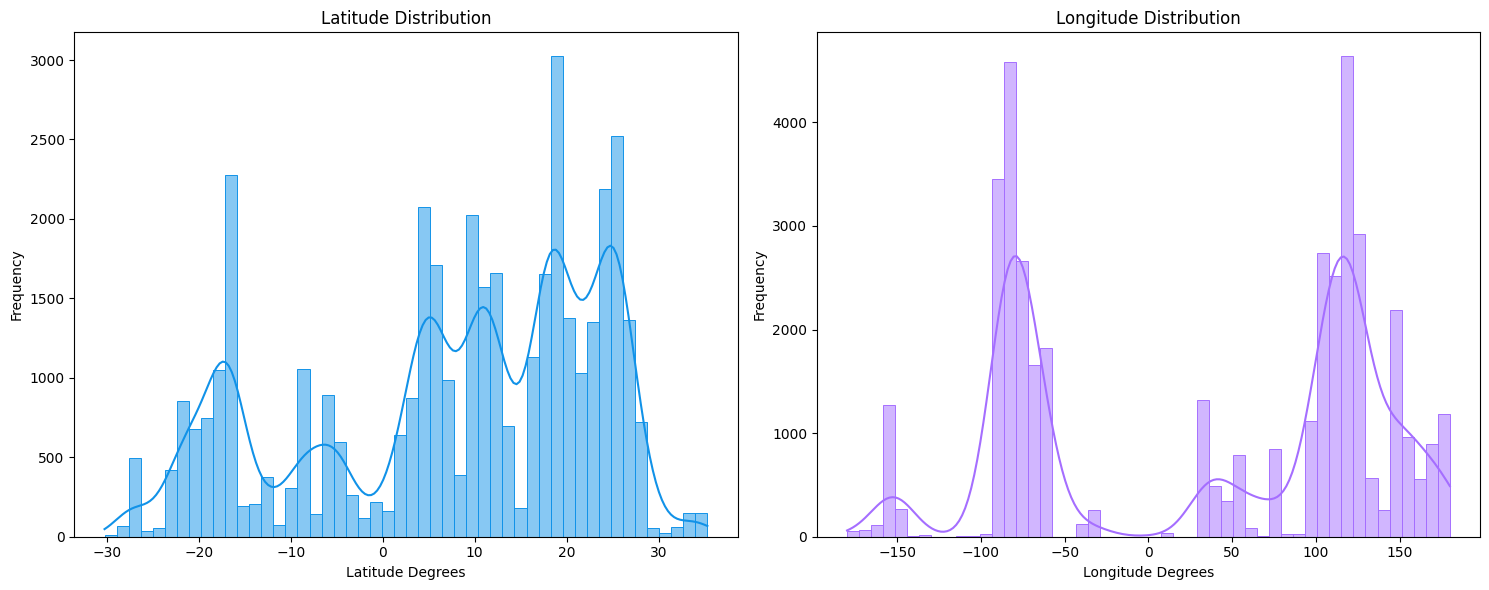

In [18]:
# Set up the figure and axes for the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define custom colors
color_latitude = '#1192e8' 
color_longitude = '#a56eff'

# Plotting Latitude Distribution
sns.histplot(data_for_eda['Latitude_Degrees'], bins=50, kde=True, color=color_latitude, edgecolor=color_latitude, ax=axes[0])
axes[0].set_title('Latitude Distribution')
axes[0].set_xlabel('Latitude Degrees')
axes[0].set_ylabel('Frequency')

# Plotting Longitude Distribution
sns.histplot(data_for_eda['Longitude_Degrees'], bins=50, kde=True, color=color_longitude, edgecolor=color_longitude, ax=axes[1])
axes[1].set_title('Longitude Distribution')
axes[1].set_xlabel('Longitude Degrees')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

🔎 **Observations:**

- **Latitude Distribution:**
    - The data is concentrated around **-20 to 30 degrees** latitude, indicating that most coral bleaching events occur in the **tropics and subtropics**.
    - Peaks are particularly noticeable around **-20 degrees** (which likely represents southern hemisphere regions) and **10-20 degrees north**, corresponding to tropical reef locations near the equator.

- **Longitude Distribution:**
    - The data is primarily concentrated between **-100 to 150 degrees** longitude.
    - There are significant peaks around **-100 degrees** (which may include regions in the Pacific Ocean and Americas) and **around 100-150 degrees**, which could correspond to locations like the **Indian Ocean** and **Western Pacific** regions.
    - The dataset includes a smaller presence of coral bleaching events in the Atlantic or other regions of the western hemisphere based on the gap near **-50 to 0 degrees** longitude.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Most coral bleaching data appears to come from tropical regions</strong>, both in the northern and southern hemispheres.</li>
        <li><strong>Pacific and Indian Ocean regions seem to dominate the dataset geographically</strong>, as indicated by the longitude distribution.</li>
    </ul>
</div>

These observations suggest that the dataset is focused on tropical coral reefs, likely located in major reef systems such as the **Great Barrier Reef** and the **Pacific coral regions**.

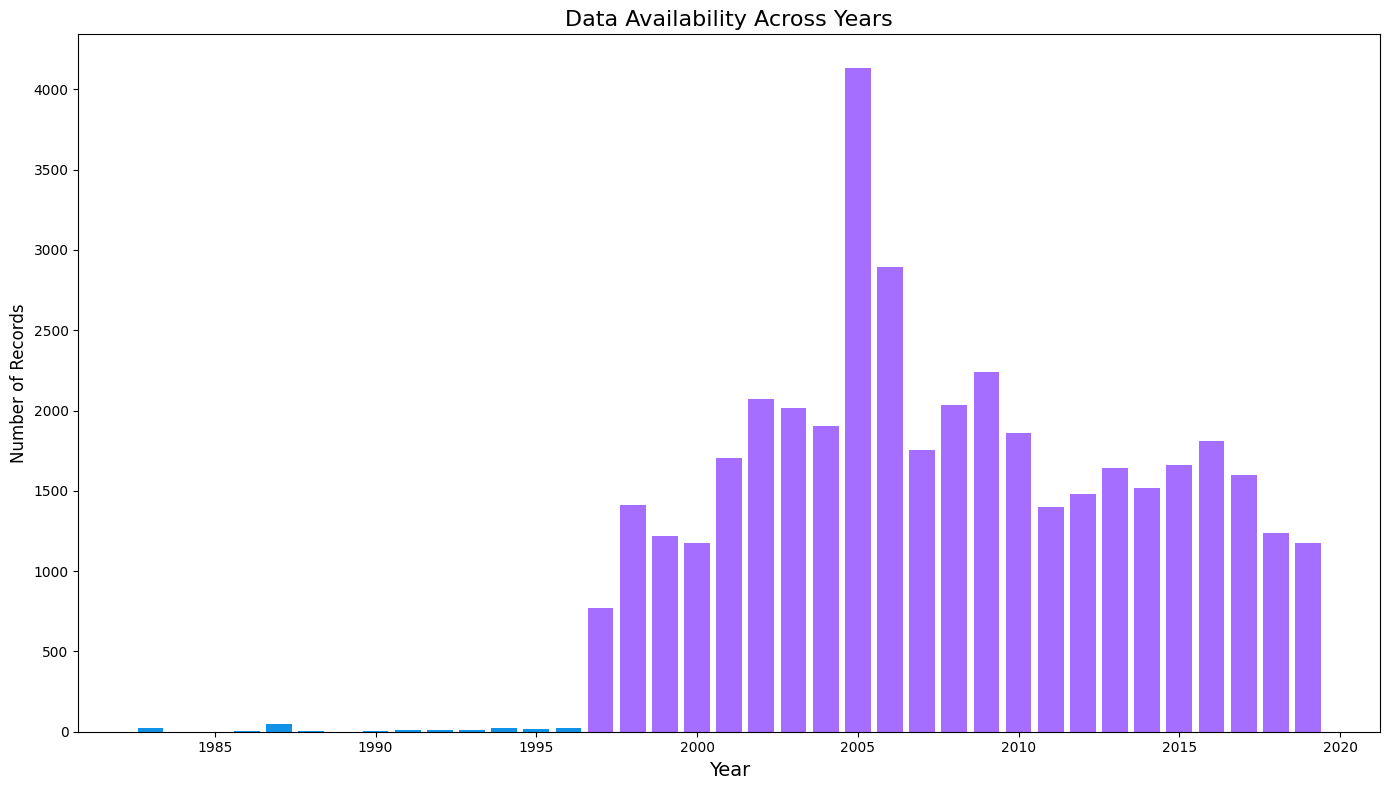

In [28]:
# Data Availablity across years
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
data_for_eda['Date'] = pd.to_datetime(data_for_eda['Date'], errors='coerce')

# Count the number of records per year
data_availability = data_for_eda['Date'].dt.year.value_counts().sort_index()

# Define colors: use '#a56eff' for years with more than 500 records, otherwise '#1192e8'
colors = ['#a56eff' if value > 500 else '#1192e8' for value in data_availability.values]

# Plotting the bar chart to show data availability across years
plt.figure(figsize=(14, 8))
plt.bar(data_availability.index, data_availability.values, color=colors)

# Set the title and labels
plt.title('Data Availability Across Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Records', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


🔎 **Observations:**

- **Pre-1995**: Very few records exist prior to the mid-1990s, suggesting that either coral bleaching was *less common* or that *data collection efforts* were not as extensive before this period.

- **1998-2005**: There is a steady increase in the number of records starting around **1998**, which coincides with some major **coral bleaching events**, including the **1998 global coral bleaching event**. This trend continues with a sharp rise through the early 2000s.

- **2005 Peak**: The year **2005** stands out as having the *highest number of records*, with **over 3,000 entries**. This spike may correspond to an **intense bleaching event** or an improvement in **data collection practices** during that year.

- **Post-2005 Decline**: After **2005**, there is a *noticeable decline* in the number of records, though the data remains relatively consistent between **2006-2015**, with some fluctuation.

- **Recent Years**: After **2015**, the number of records begins to decline again, with *very low data availability* in **2020**. This could be due to a variety of factors, including **less reporting**, **shifts in research focus**, or the impacts of **recent global events**.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Coral bleaching is heavily concentrated in tropical regions across the Pacific, Indian, and Atlantic Oceans.</strong></li>
        <li>The <strong>Pacific</strong> and <strong>Indian Oceans</strong> exhibit widespread and scattered bleaching events, reflecting the vast coral reef systems in these areas.</li>
        <li>The <strong>Caribbean</strong> and <strong>Red Sea</strong> stand out as smaller regions with high concentrations of bleaching events, indicating significant coral stress.</li>
    </ul>
</div>


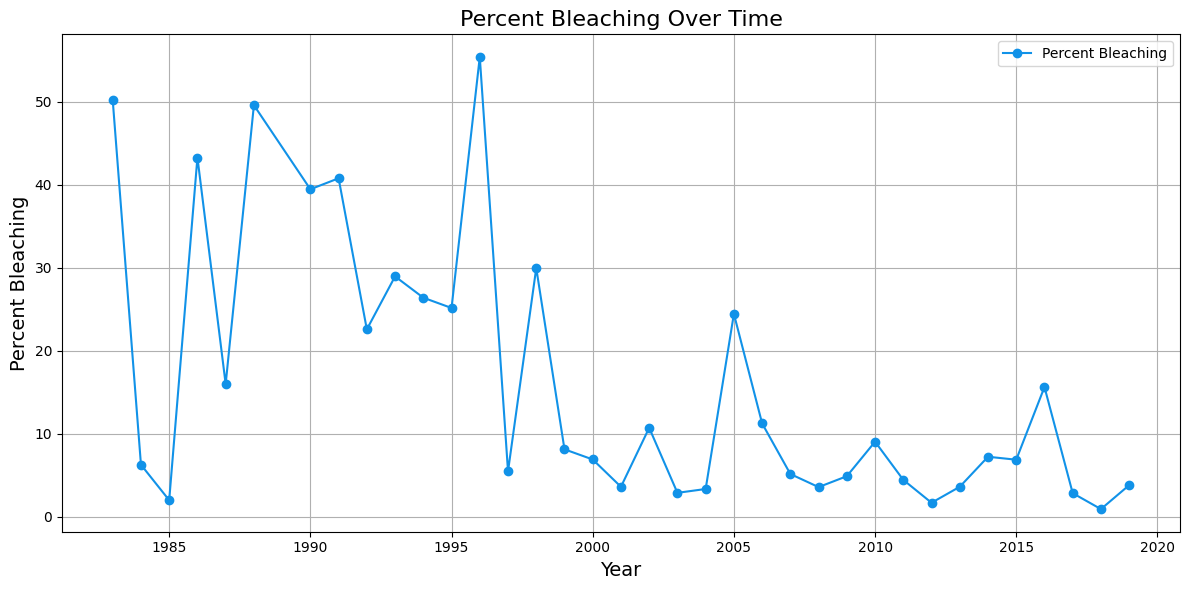

In [36]:
# Group the data by year and calculate the mean for Percent_Bleaching
percent_bleaching_over_time = data_for_eda.groupby(data_for_eda['Date'].dt.year)['Percent_Bleaching'].mean().reset_index()

# Define custom palette
custom_palette = ['#1192e8', '#a56eff']  # Blue and Pink

# Plotting the trends over time
plt.figure(figsize=(12, 6))
plt.plot(
    percent_bleaching_over_time['Date'], 
    percent_bleaching_over_time['Percent_Bleaching'], 
    label='Percent Bleaching', 
    color='#1192e8', 
    marker='o'
)

# Setting labels, title, and grid
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percent Bleaching', fontsize=14)
plt.title('Percent Bleaching Over Time', fontsize=16)
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



🔎 **Observations:**

- **Percent Bleaching Over Time (Top Graph):**
    - **1980s-1990s:** Severe bleaching events, with peaks up to **80%** in the early 1980s, followed by a **sharp decline** to below **20%** by the mid-1990s.
    - **Late 1990s-2000s:** Bleaching fluctuated between **20-60%**, with a spike in **1998** (global bleaching event) and another in **2005**, before dropping to **10-30%** in the 2010s.
    - **2020:** Bleaching levels fell to below **10%**.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Early bleaching events were more severe,</strong> especially in the 1980s and 1990s.</li>
        <li><strong>2005 saw a peak</strong> in bleaching events, followed by a gradual decline in intensity and frequency.</li>

</div>

##### Key Takeaways
<div style="border-radius:10px;padding: 15px;background-color:#6495ED;color:white;font-size:100%;text-align:left">
    ⭐️ <strong>Key Takeaways:</strong>
    <ul>
        <li><strong>Frequent extreme SSTA events</strong> contribute to coral bleaching, with severe anomalies driving stress in specific regions.</li>
        <br>
        <li><strong>Prolonged thermal stress</strong> (high DHW) plays a significant role in sustained coral bleaching and ecosystem damage.</li>
        <br>
        <li><strong>Localized extremes</strong> in SST and SSTA indicate specific regions facing high, sustained heat stress, increasing bleaching risk.</li>
        <br>
        <li><strong>SST Maximum values above 308 K</strong> (~35°C) highlight areas of extreme warming events, correlated with severe coral stress.</li>
        <br>
        <li><strong>High TSA values</strong> signal areas under heightened bleaching risk, with high frequency and DHW further weakening coral resilience.</li>
        <br>
        <li><strong>Outliers in SST, SSTA, and TSA</strong> across various regions indicate the presence of localized thermal stress, driving both acute and chronic bleaching events.</li>
    </ul>
</div>

In [39]:
data_for_eda[['SSTA', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_DHW', 'TSA', 'TSA_Maximum', 'TSA_Frequency', 'TSA_DHW']].describe(include='all')

,SSTA,SSTA_Maximum,SSTA_Frequency,SSTA_DHW,TSA,TSA_Maximum,TSA_Frequency,TSA_DHW
count,40891.000000,40891.000000,40891.000000,40891.000000,40891.000000,40891.000000,40891.000000,40891.000000
mean,0.255155,3.468892,7.457969,2.949478,-0.982713,2.798671,2.033454,1.202565
std,0.828159,1.190870,6.146276,4.507711,1.639617,0.979867,2.993102,3.421419
min,-4.620000,0.000000,0.000000,0.000000,-11.970000,0.000000,0.000000,0.000000
25%,-0.250000,2.820000,3.000000,0.000000,-1.810000,2.250000,0.000000,0.000000
50%,0.240000,3.180000,6.000000,1.290000,-0.740000,2.570000,1.000000,0.000000
75%,0.750000,3.700000,11.000000,4.160000,0.100000,3.050000,3.000000,1.150000
max,5.900000,19.890000,52.000000,53.600000,5.900000,13.450000,29.000000,52.450000


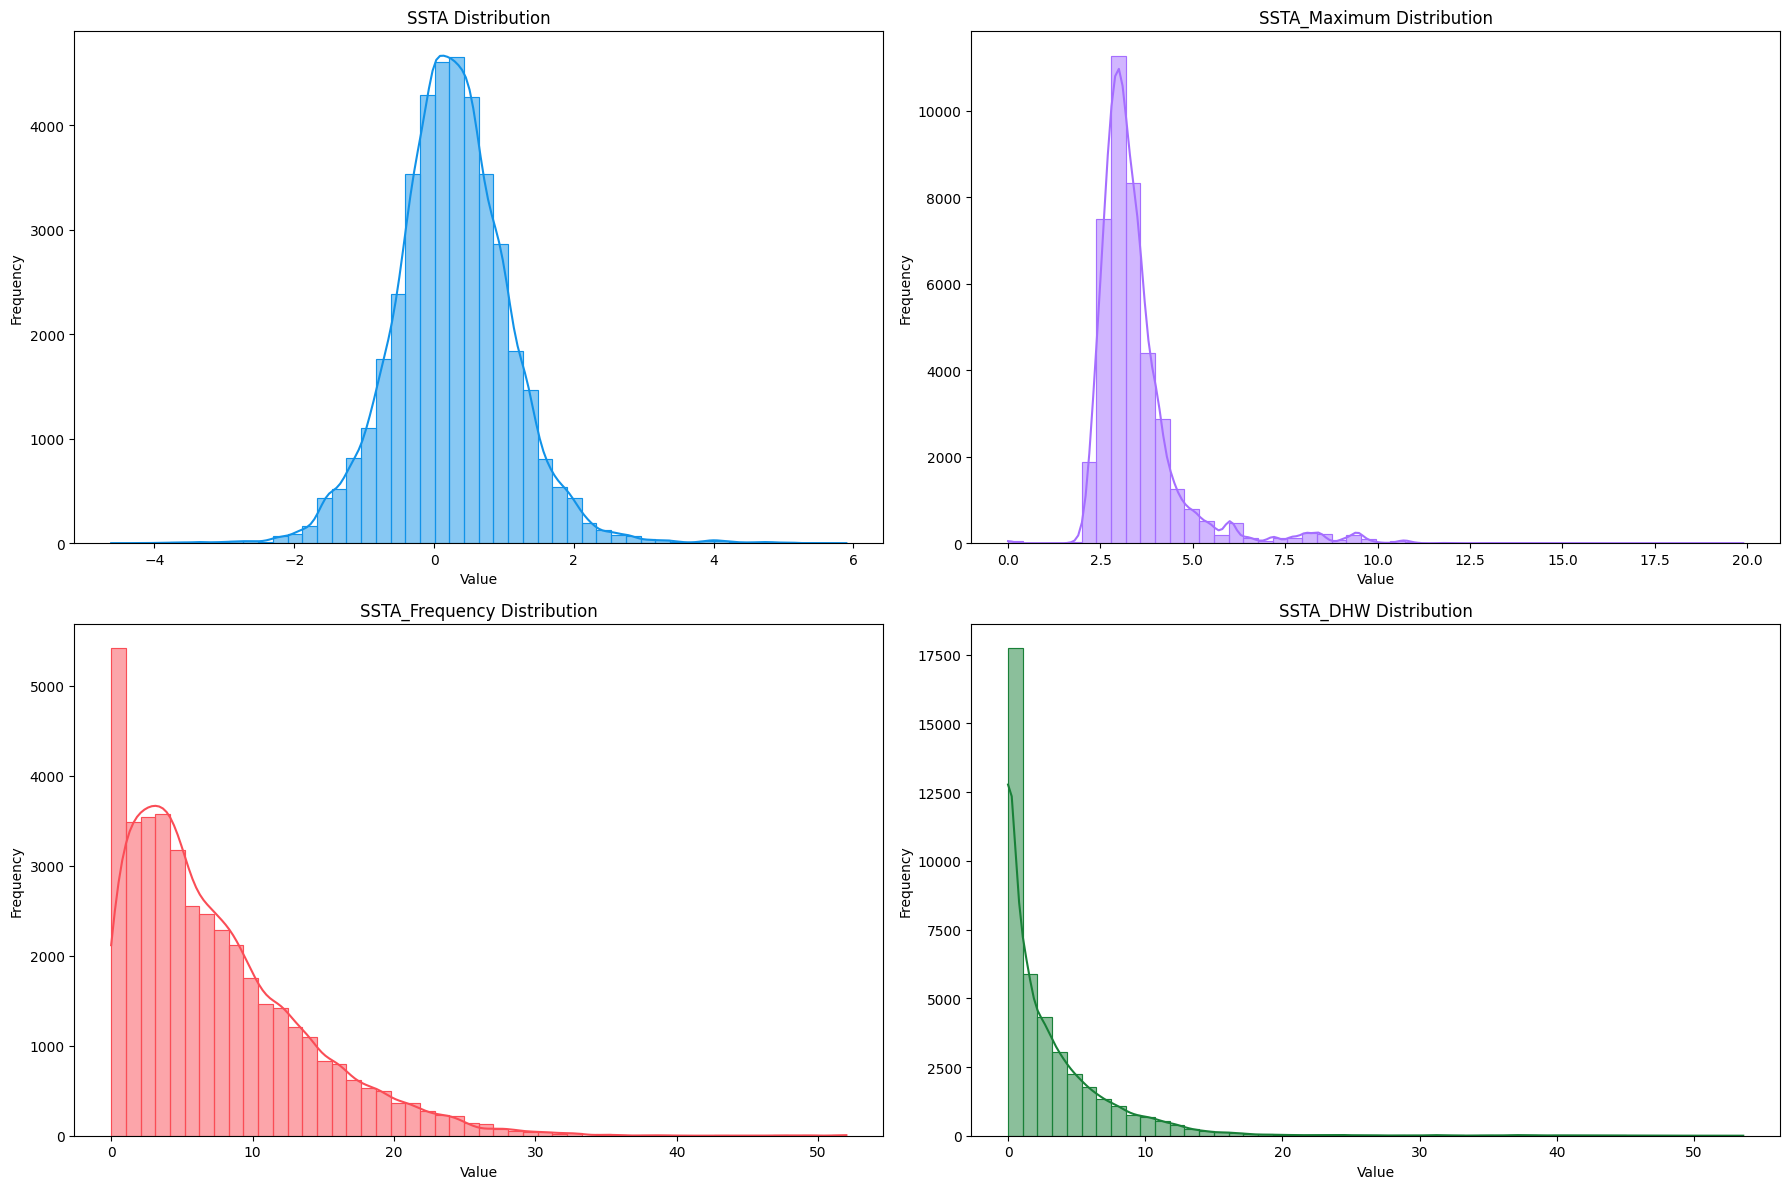

In [41]:
# Define custom palette
custom_palette = ['#1192e8', '#a56eff', '#fa4d56', '#198038']  # Blue, Pink, Red, Green

# Create a figure with 4 subplots (2x2 layout)
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot SSTA on the first subplot with blue color
sns.histplot(data_for_eda['SSTA'], bins=50, kde=True, color=custom_palette[0], label='SSTA', alpha=0.5, ax=axs[0, 0], edgecolor=custom_palette[0])
axs[0, 0].set_title('SSTA Distribution')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')

# Plot SSTA_Maximum on the second subplot with pink color
sns.histplot(data_for_eda['SSTA_Maximum'], bins=50, kde=True, color=custom_palette[1], label='SSTA_Maximum', alpha=0.5, ax=axs[0, 1], edgecolor=custom_palette[1])
axs[0, 1].set_title('SSTA_Maximum Distribution')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')

# Plot SSTA_Frequency on the third subplot with red color
sns.histplot(data_for_eda['SSTA_Frequency'], bins=50, kde=True, color=custom_palette[2], label='SSTA_Frequency', alpha=0.5, ax=axs[1, 0], edgecolor=custom_palette[2])
axs[1, 0].set_title('SSTA_Frequency Distribution')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')

# Plot SSTA_DHW on the fourth subplot with green color
sns.histplot(data_for_eda['SSTA_DHW'], bins=50, kde=True, color=custom_palette[3], label='SSTA_DHW', alpha=0.5, ax=axs[1, 1], edgecolor=custom_palette[3])
axs[1, 1].set_title('SSTA_DHW Distribution')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

🔎 **Observations:**

- **SSTA Distribution (Top Left):**
    - Centered around **0 K**, most anomalies are mild, between **-1 K and 1 K**, but some reach **5-6 K**, indicating significant warming events.

- **SSTA Maximum Distribution (Top Right):**
    - Skewed right, with most anomalies between **2-5 K**; some exceed **10 K**, highlighting severe warming in specific regions.

- **SSTA Frequency Distribution (Bottom Left):**
    - Heavily skewed, with most regions facing fewer than **10 anomaly events**, but some experience up to **50**, reflecting persistent thermal stress.

- **SSTA DHW Distribution (Bottom Right):**
    - Right-skewed, with most regions below **10 DHW**, but some exceed **50**, indicating extreme and prolonged thermal stress.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Moderate anomalies are common</strong>, but extreme SSTA events drive coral stress.</li>
        <li><strong>Prolonged thermal stress (high DHW)</strong> contributes to severe bleaching in vulnerable regions.</li>
        <li><strong>Localized extreme warming events</strong> are major contributors to coral bleaching.</li>
    </ul>
</div>

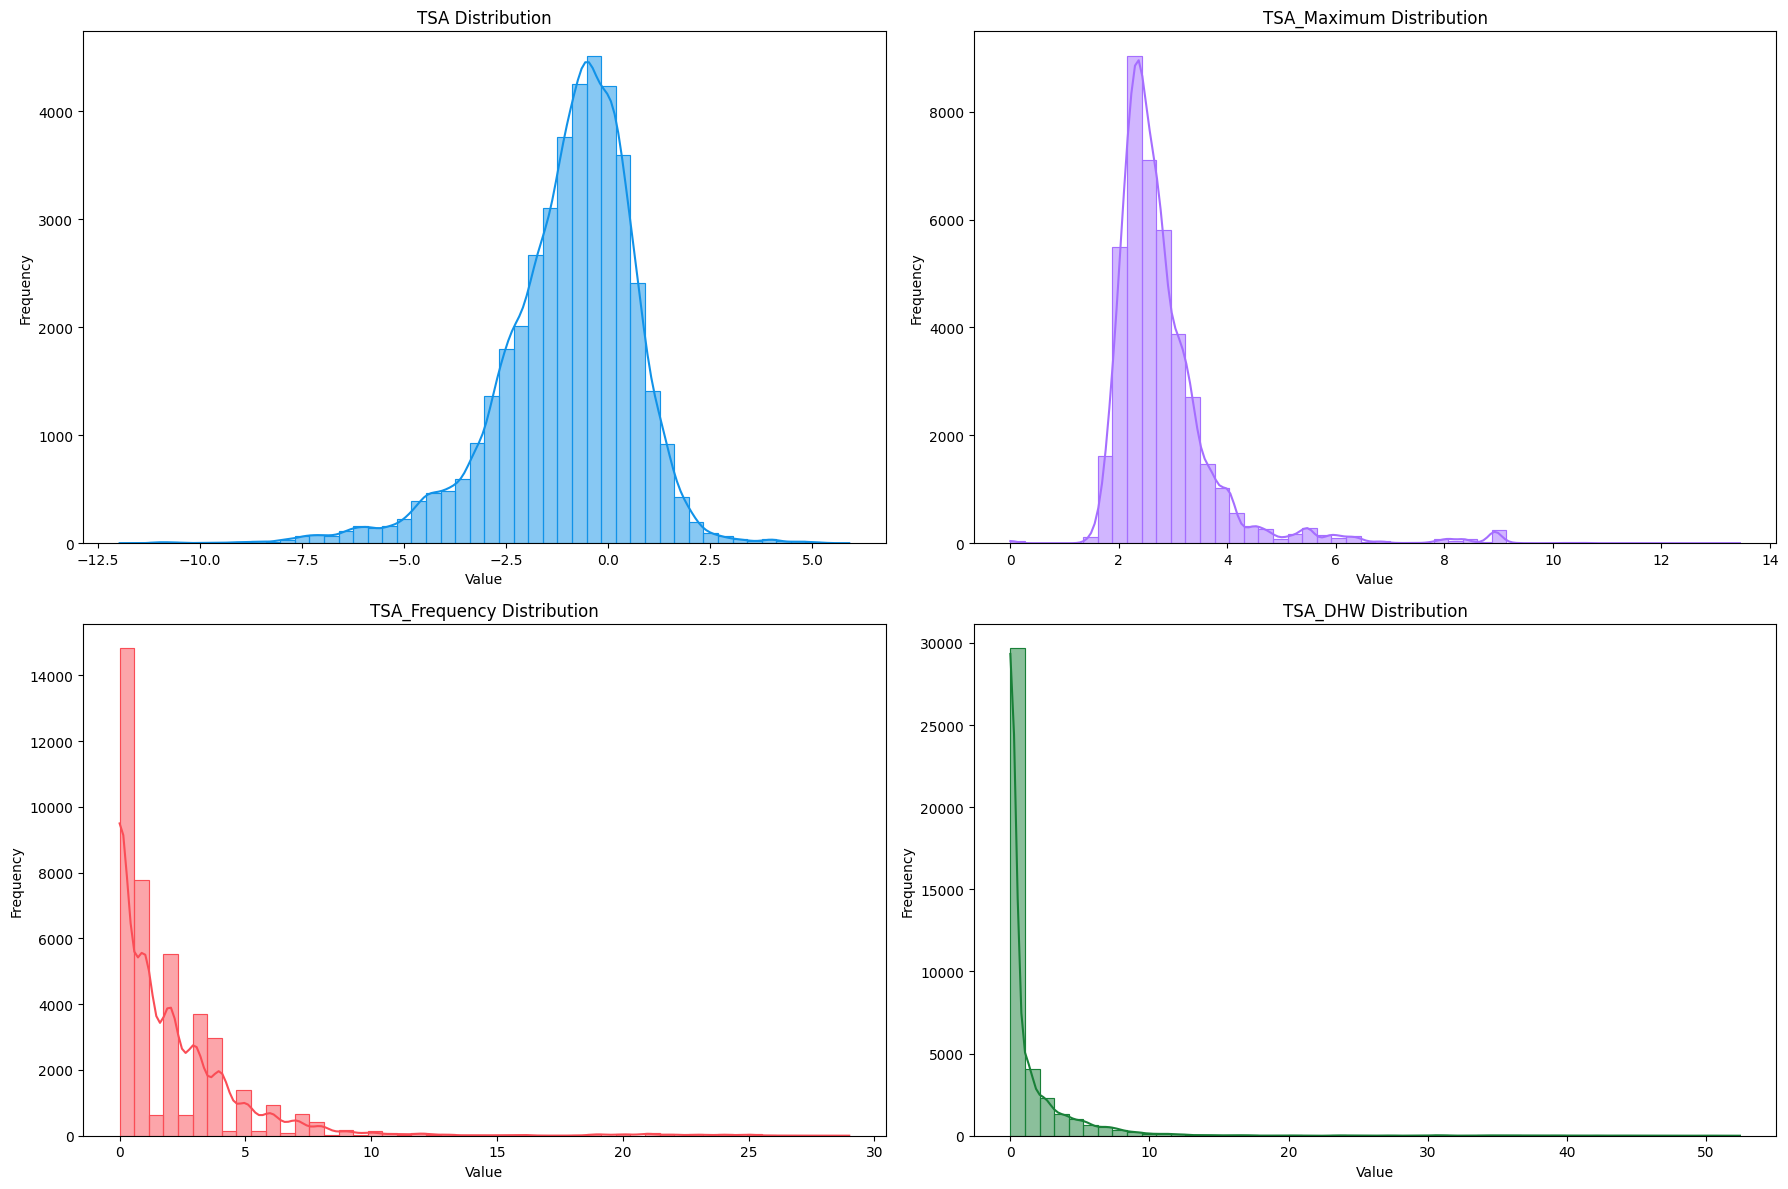

In [42]:
# Define custom palette
custom_palette = ['#1192e8', '#a56eff', '#fa4d56', '#198038']  # Blue, Pink, Red, Green

# Create a figure with 4 subplots (2x2 layout)
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot TSA on the first subplot with blue color
sns.histplot(data_for_eda['TSA'], bins=50, kde=True, color=custom_palette[0], label='TSA', alpha=0.5, ax=axs[0, 0], edgecolor=custom_palette[0])
axs[0, 0].set_title('TSA Distribution')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')

# Plot TSA_Maximum on the second subplot with pink color
sns.histplot(data_for_eda['TSA_Maximum'], bins=50, kde=True, color=custom_palette[1], label='TSA_Maximum', alpha=0.5, ax=axs[0, 1], edgecolor=custom_palette[1])
axs[0, 1].set_title('TSA_Maximum Distribution')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')

# Plot TSA_Frequency on the third subplot with red color
sns.histplot(data_for_eda['TSA_Frequency'], bins=50, kde=True, color=custom_palette[2], label='TSA_Frequency', alpha=0.5, ax=axs[1, 0], edgecolor=custom_palette[2])
axs[1, 0].set_title('TSA_Frequency Distribution')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')

# Plot TSA_DHW on the fourth subplot with green color
sns.histplot(data_for_eda['TSA_DHW'], bins=50, kde=True, color=custom_palette[3], label='TSA_DHW', alpha=0.5, ax=axs[1, 1], edgecolor=custom_palette[3])
axs[1, 1].set_title('TSA_DHW Distribution')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

🔎 **Observations:**

- **TSA Distribution:** Centered around **0**, slightly skewed negative, with some areas experiencing significantly lower thermal stress.
- **TSA Maximum Distribution:** Concentrated between **2-4 K**, with fewer cases above **5 K**, indicating areas with higher bleaching risk.
- **TSA Frequency Distribution:** Most regions have **0-5 events**, but persistent stress occurs in some areas.
- **TSA DHW Distribution:** Values mostly under **10 K-weeks**, but some areas experience prolonged stress, up to **50 K-weeks**.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Negative TSA values</strong> reduce coral stress; positive values increase bleaching risk.</li>
        <li><strong>TSA Maximum values around 3 K</strong> signal heightened bleaching risk.</li>
        <li><strong>High TSA frequency</strong> weakens coral resilience.</li>
        <li><strong>High TSA DHW</strong> indicates severe, prolonged stress, increasing vulnerability to bleaching.</li>
    </ul>
</div>


## Looking at Other Factors

/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_49719/2632740671.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




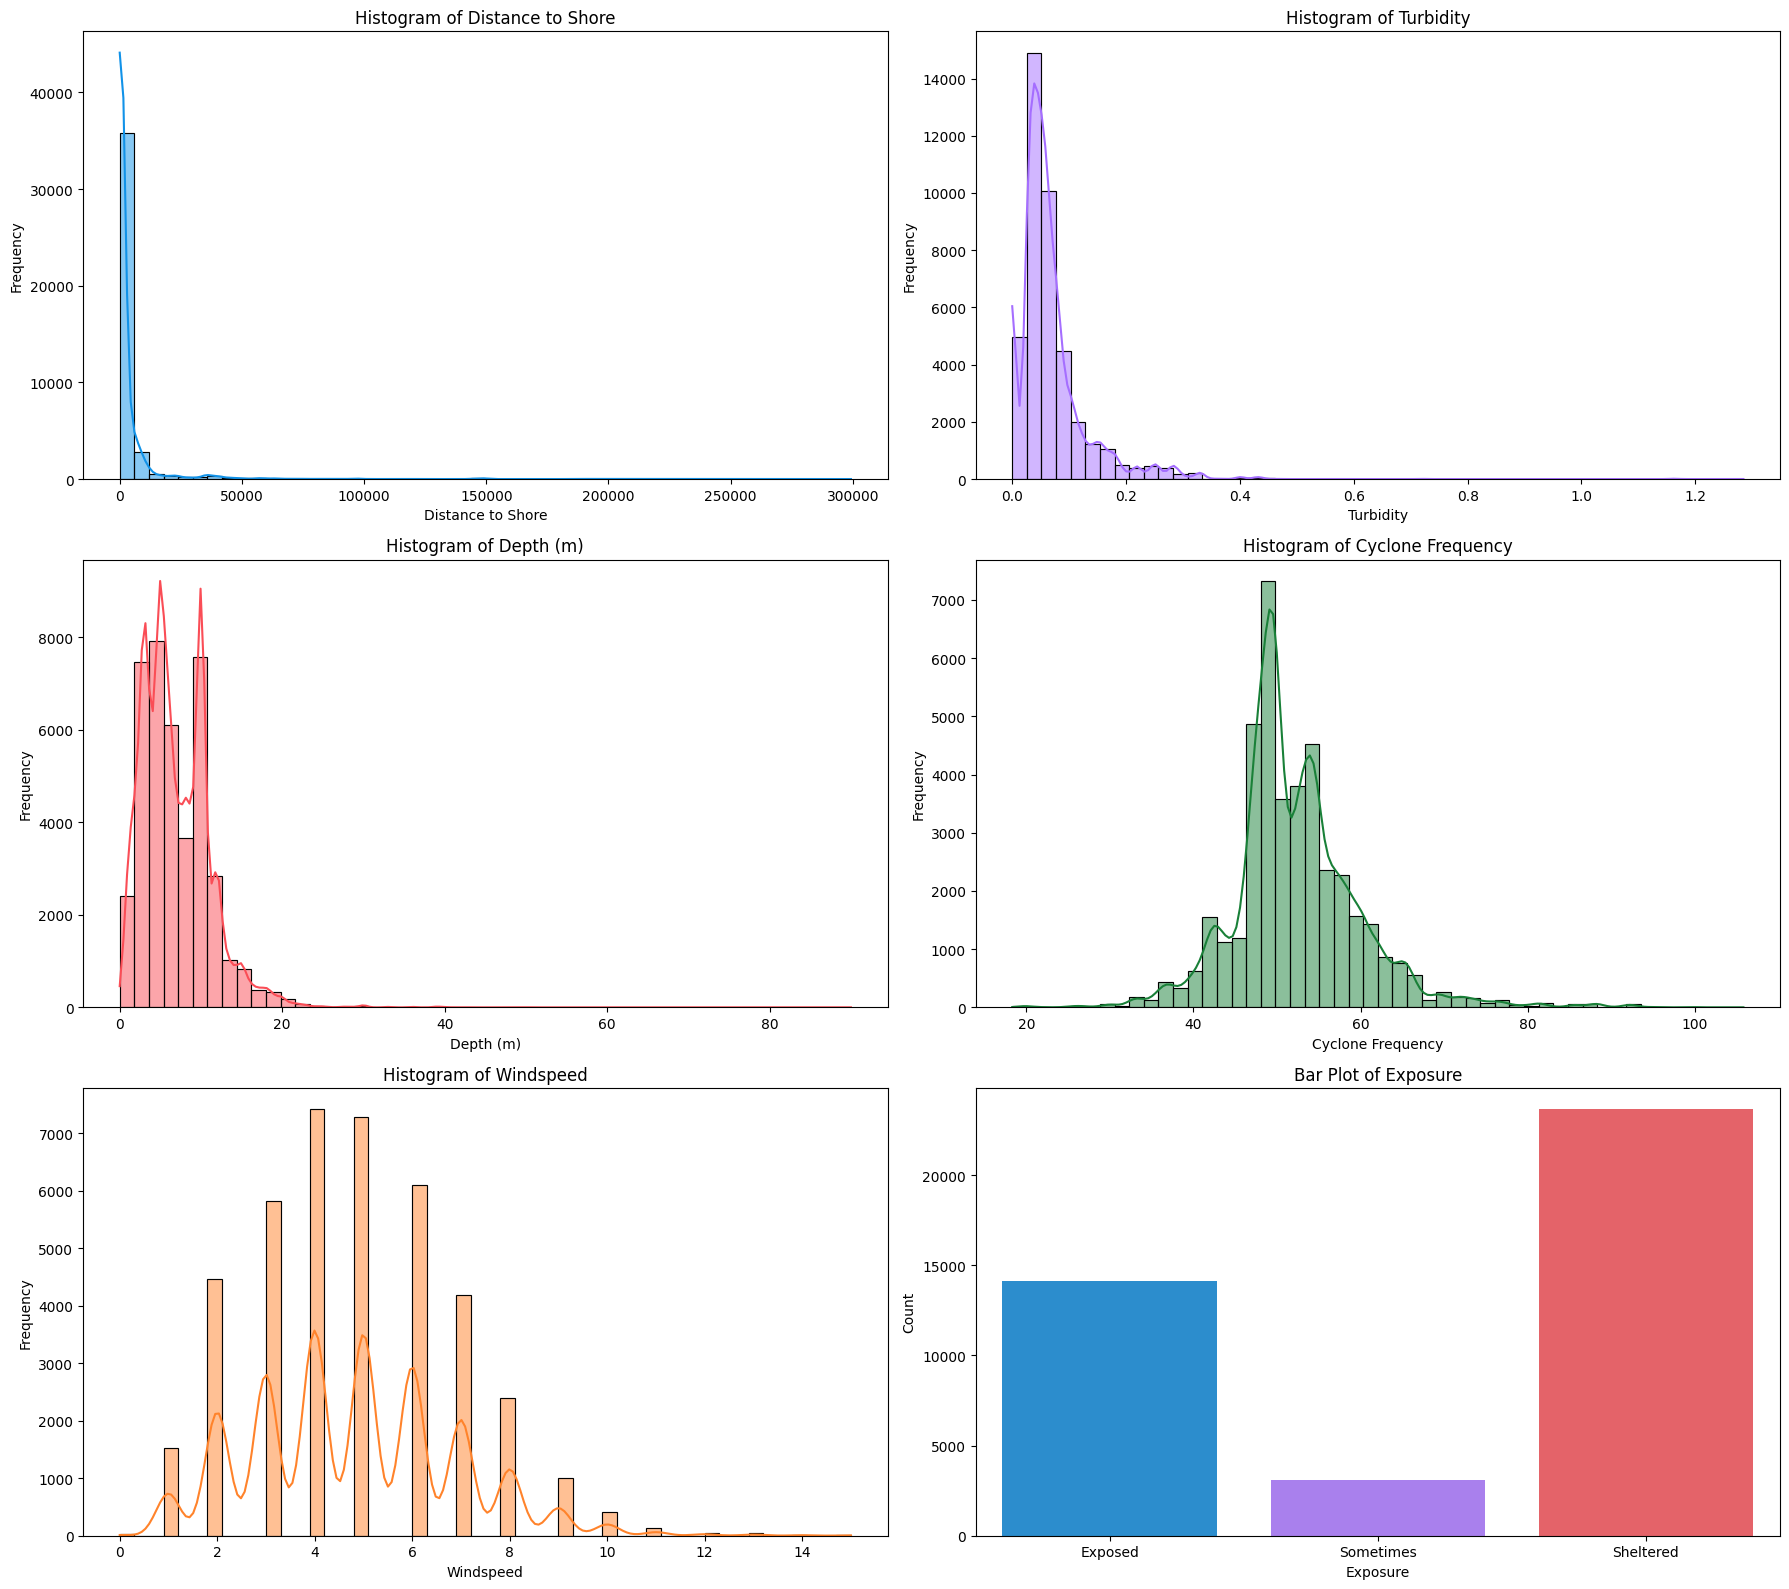

In [43]:
# Set up the figure for the histograms, bar plot, and line plot
plt.figure(figsize=(18, 16))

# Custom colors with the added color #ff832b
colors = ['#1192e8', '#a56eff', '#fa4d56', '#198038', '#ff832b']  # Custom color palette

# Plot histogram for Distance_to_Shore (Blue)
plt.subplot(3, 2, 1)
sns.histplot(data_for_eda['Distance_to_Shore'], bins=50, kde=True, color=colors[0])
plt.title('Histogram of Distance to Shore')
plt.xlabel('Distance to Shore')
plt.ylabel('Frequency')

# Plot histogram for Turbidity (Pink)
plt.subplot(3, 2, 2)
sns.histplot(data_for_eda['Turbidity'], bins=50, kde=True, color=colors[1])
plt.title('Histogram of Turbidity')
plt.xlabel('Turbidity')
plt.ylabel('Frequency')

# Plot histogram for Depth_m (Red)
plt.subplot(3, 2, 3)
sns.histplot(data_for_eda['Depth_m'], bins=50, kde=True, color=colors[2])
plt.title('Histogram of Depth (m)')
plt.xlabel('Depth (m)')
plt.ylabel('Frequency')

# Plot histogram for Cyclone_Frequency (Green)
plt.subplot(3, 2, 4)
sns.histplot(data_for_eda['Cyclone_Frequency'], bins=50, kde=True, color=colors[3])
plt.title('Histogram of Cyclone Frequency')
plt.xlabel('Cyclone Frequency')
plt.ylabel('Frequency')

# Plot histogram for Windspeed (Custom Orange #ff832b)
plt.subplot(3, 2, 5)
sns.histplot(data_for_eda['Windspeed'], bins=50, kde=True, color=colors[4])
plt.title('Histogram of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')

# Plot bar plot for Exposure with 3 distinct colors
plt.subplot(3, 2, 6)
sns.countplot(x='Exposure', data=data_for_eda, palette=[colors[0], colors[1], colors[2]])  # Use 3 colors
plt.title('Bar Plot of Exposure')
plt.xlabel('Exposure')
plt.ylabel('Count')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

🔎 **Observations:**

- **Distance to Shore (Top left):** Most coral sites are located near shore, within **10 km**, with a few outliers up to **300 km** offshore. Nearshore reefs are more exposed to human impacts like runoff, while offshore reefs face oceanic threats.

- **Turbidity (Top right):** Turbidity is generally low, with most values below **0.1**. Higher turbidity, often caused by runoff, can reduce light and stress corals, while low turbidity supports photosynthesis and coral health.

- **Depth (Middle left):** Coral reefs are mostly found in shallow waters (**0-20 meters**). Shallow reefs are more prone to thermal stress and bleaching, while deeper reefs may be less affected by surface temperature changes but face limited light.

- **Cyclone Frequency (Middle right):** Coral sites typically experience **40-60 cyclones**, with some regions facing up to **100**. Cyclones can damage reefs but also cool waters, providing temporary thermal relief.

- **Windspeed (Bottom left):** Wind speeds generally range from **3 to 7 m/s**. Moderate winds reduce thermal stress, while stronger winds during storms can cause physical damage to reefs.

- **Exposure (Bottom right):** Most coral sites are **sheltered** (~12,000 sites), offering protection from strong waves, though limited water circulation increases heat stress risks during warm periods.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Distance to Shore:</strong> Nearshore reefs face human impacts, while offshore reefs are influenced by broader oceanic factors.</li>
        <li><strong>Turbidity:</strong> Low turbidity supports coral health, while higher levels reduce light and can stress reefs.</li>
        <li><strong>Depth:</strong> Shallow reefs are more vulnerable to thermal stress; deeper reefs may handle temperature changes better but face light limitations.</li>
        <li><strong>Cyclone Frequency:</strong> Cyclones can cause damage but may reduce thermal stress, influencing reef resilience.</li>
        <li><strong>Windspeed:</strong> Moderate wind speeds cool waters, while high speeds from storms can physically damage reefs.</li>
        <li><strong>Exposure:</strong> Sheltered reefs are protected from waves but more vulnerable to heat stress due to limited water circulation.</li>
    </ul>
</div>

Coral reefs are shaped by factors like **distance to shore, turbidity, depth, cyclone frequency, windspeed**, and **exposure**. Nearshore reefs face human-driven stress, while offshore and deeper reefs are influenced by oceanic conditions, making these factors key in predicting coral resilience and mitigating bleaching risks.

## Geographical Distribution

In [50]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Define a function to plot data on a world map using Cartopy


def plot_cartopy_geographical(data, variable, title, cmap='viridis'):
    plt.figure(figsize=(18, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='110m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    scatter = ax.scatter(data['Longitude_Degrees'], data['Latitude_Degrees'], c=data[variable], 
                         cmap=cmap, s=10, alpha=0.7, transform=ccrs.PlateCarree())
    plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05, label=variable)
    plt.title(title)
    plt.show()

/Users/amulya/.pyenv/versions/3.10.10/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip

/Users/amulya/.pyenv/versions/3.10.10/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip



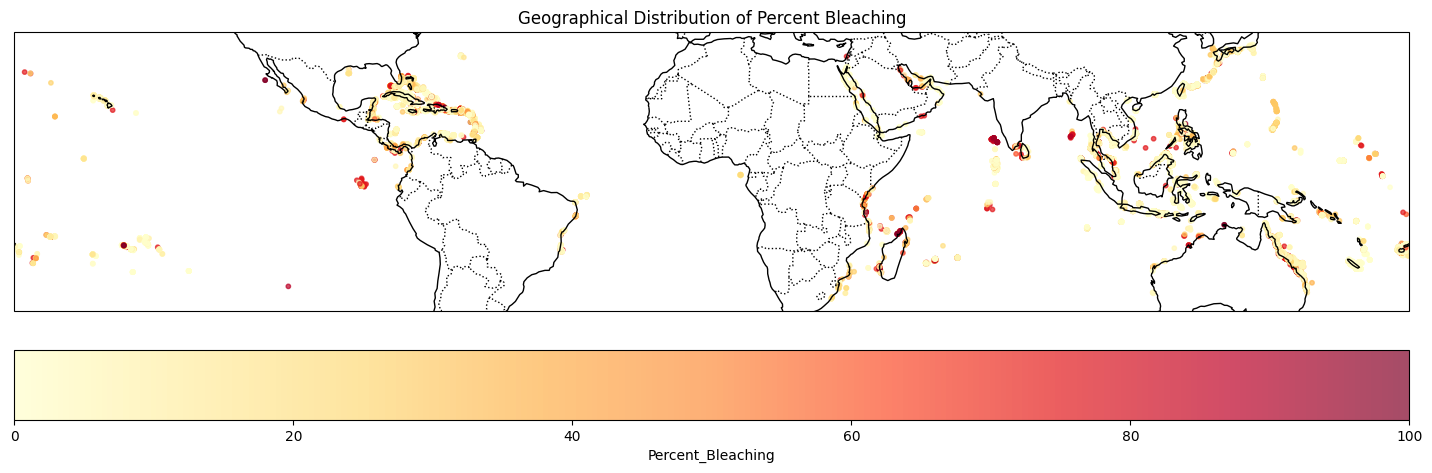

In [51]:
plot_cartopy_geographical(data_for_eda, 'Percent_Bleaching', 'Geographical Distribution of Percent Bleaching', cmap='YlOrRd')

# Advanced Interactive Visualizations